<a href="https://colab.research.google.com/github/abdulloshoh/Transports-Classification-/blob/main/Semantic_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install fastai==2.7.13

In [ ]:
import torch
import fastai

print(torch.__version__)
print(fastai.__version__)


In [7]:
from fastai.vision.all import *
import numpy as np

path = untar_data(URLs.CAMVID_TINY)
# label_getter funksiya
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'  # file nomini qaytaradi

# dataloader
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'),
                                              label_func=label_getter, codes=np.loadtxt(path/'codes.txt',dtype=str))
# training
learn = unet_learner(dls, resnet34)
learn.fine_tune(12) # transfer learning 12 epoch

epoch,train_loss,valid_loss,time
0,3.282799,2.592399,00:01


epoch,train_loss,valid_loss,time
0,2.001586,1.687649,00:01
1,1.703989,1.391240,00:01
2,1.521725,1.364012,00:01
3,1.405854,1.171097,00:02
4,1.282771,0.950405,00:01
5,1.160097,0.863657,00:01
6,1.047471,0.770072,00:01
7,0.951904,0.770782,00:01
8,0.870937,0.764979,00:01
9,0.802755,0.720560,00:01


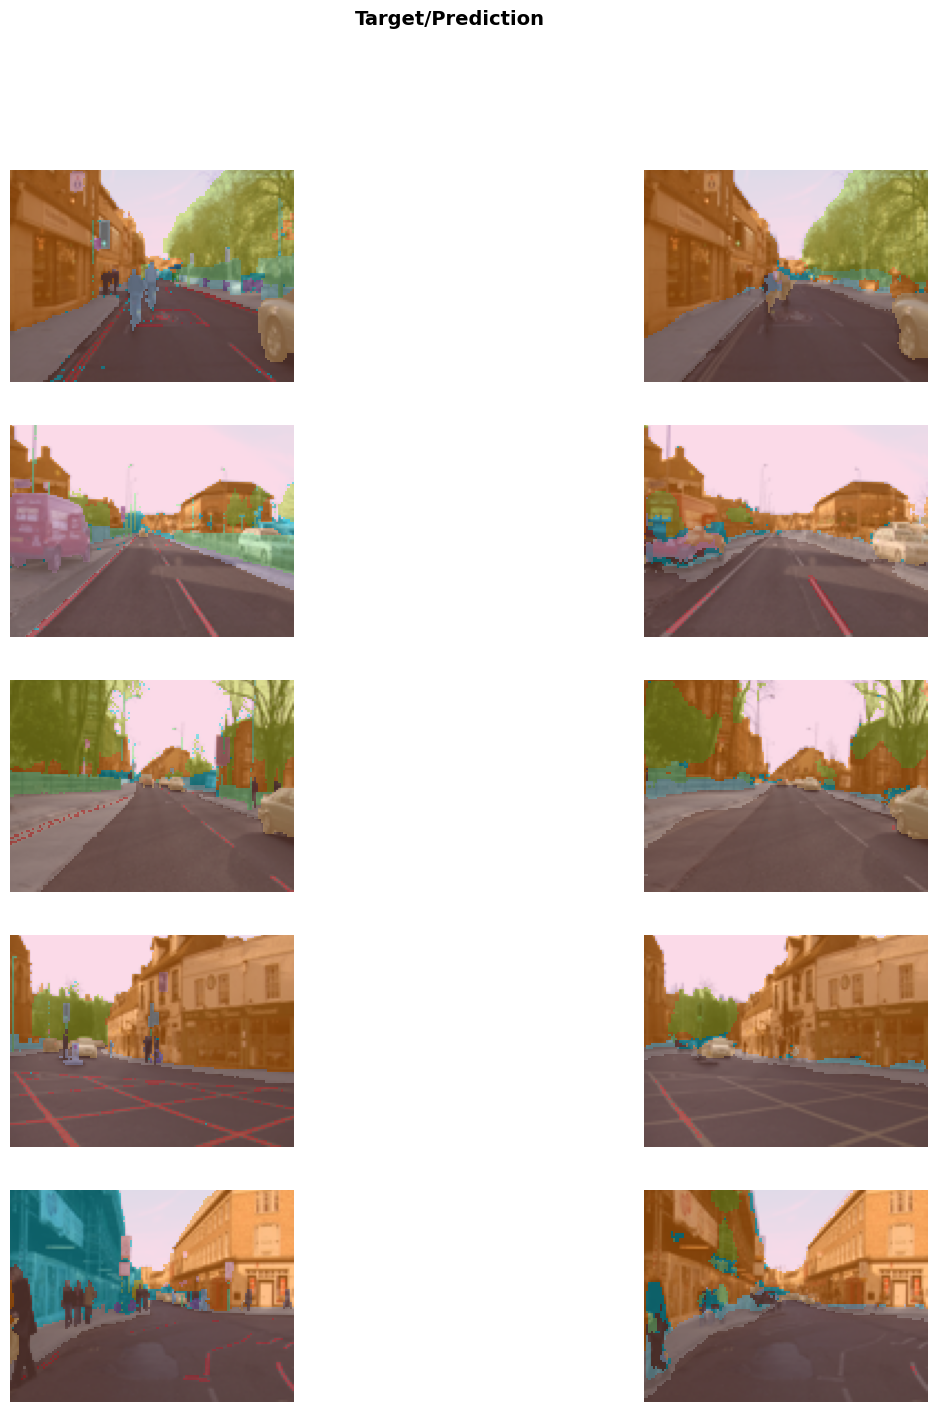

In [8]:
# for cheking the model
learn.show_results(max_n=5, figsize=(15,16))